<a href="https://colab.research.google.com/github/rafaelcostaleite/lab-finances/blob/main/portifolio_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#autentica no Google Drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import random as rd
import statsmodels as st
import pandas_datareader as dt

In [ ]:
#Importa a planilha
planilha = 'https://docs.google.com/spreadsheets/d/1rDGXWfo0mQ070AmhmnzfO684ribvz6jFcV7E5UZRCMI/edit#gid=1432567376'
aba = 'Corretagem'

wb = gc.open_by_url(planilha)
sheet = wb.worksheet(aba)
data = sheet.get_all_values()

#Cria DataFrame. Obs: tds os dados são string
data_df = pd.DataFrame(data)

#Transforma primeira coluna e linha
data_df.columns = data_df.iloc[0]
data_df = data_df.iloc[1:]
data_df.head()

,Banco,Cliente,Assessor,Nr. Nota,Data pregão,Tipo,Segmento,Titulo,Quantidade,Preço,Total,Operação,Today,Posição,Variação
1,746,1982-8 1630552-6,1012,204230,07/02/2020,Fundos,Títulos Imobiliários,BCFF11,1,"100,32","100,32",Compra,"90,68","90,68","(9,64)"
2,746,1982-8 1630552-6,1012,204230,07/02/2020,Fundos,Logística,SDIL11,1,"117,8","117,80",Compra,"101,74","101,74","(16,06)"
3,746,1982-8 1630552-6,1012,560247,08/04/2020,Fundos,Títulos Imobiliários,BCFF11,12,"80,54","966,48",Compra,"90,68","1.088,16","121,68"
4,746,1982-8 1630552-6,1012,560247,08/04/2020,Fundos,Logística,SDIL11,10,"94,8","948,00",Compra,"101,74","1.017,40","69,40"
5,746,1982-8 1630552-6,1012,560247,08/04/2020,Ações,Bancos,ITSA4,100,"9,37","937,00",Compra,"9,02","902,00","(35,00)"


In [ ]:
#Tratamento de dados
data_df['Posição'] = data_df['Posição'].apply(lambda x: '0' if x == '#N/A' else x)
data_df['Posição'] = data_df['Posição'].apply(lambda x: x.replace('.',''))
data_df['Posição'] = data_df['Posição'].apply(lambda x: x.replace(',','.'))


In [ ]:
#Cria novo DataFrame com os tipos de dados definidos
new_data_df = {
'Stock': data_df['Titulo'].astype(str),
'Tipo': data_df['Tipo'].astype(str),
'Segmento': data_df['Segmento'].astype(str),
'Pos': data_df['Posição'].astype(float),
}
data_df

#Cria novo dataframe para encontrar o peso por ação
stock = pd.DataFrame(new_data_df)

#Filtra quem tem valor
stock = stock[stock.Pos > 0]

#Agrupa
stock = stock.groupby(['Stock']).sum()

stock_tot = stock.sum()
stock_tot = stock_tot.tolist()
stock_tot = stock_tot[0]
stock_tot

#Análise do peso por ação
stock['Peso'] = stock['Pos']/stock_tot
stock = stock.sort_values(by='Peso', ascending=False)
stock


,Pos,Peso
Stock,,
RECT11,5211.00,0.261895
BPFF11,3600.96,0.180977
MFII11,2523.40,0.126821
QAGR11,2093.50,0.105215
BBDC4,1978.00,0.099410
SDIL11,1322.62,0.066472
BCFF11,1178.84,0.059246
MXRF11,1087.00,0.054630
ITSA4,902.00,0.045333


In [ ]:
  stock.sum()

Pos     19897.32
Peso        1.00
dtype: float64

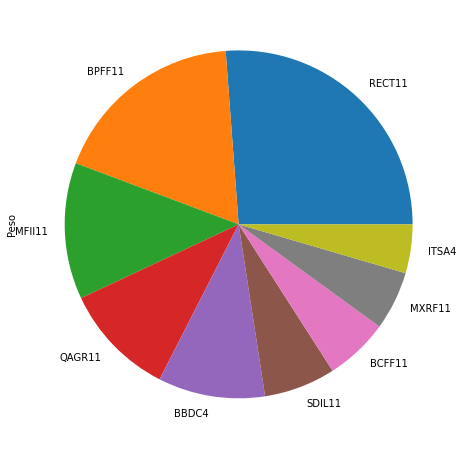

In [ ]:
stock.plot.pie(y='Peso', figsize=(8, 8), legend=False)

In [ ]:
#Cria novo data frame para análise do peso por segmento
segmto = pd.DataFrame(new_data_df)
segmto = segmto[segmto.Pos > 0]
segmto = segmto.groupby(['Segmento']).sum()

stock_tot = stock.sum()
stock_tot = stock_tot.tolist()
stock_tot = stock_tot[0]
stock_tot

segmto['Peso'] = segmto['Pos']/stock_tot
segmto = segmto.sort_values(by='Peso', ascending=False)
segmto


,Pos,Peso
Segmento,,
Híbrido,8821.40,0.443346
Outros,3600.96,0.180977
Bancos,2880.00,0.144743
Lajes Corporativas,2093.50,0.105215
Logística,1322.62,0.066472
Títulos Imobiliários,1178.84,0.059246


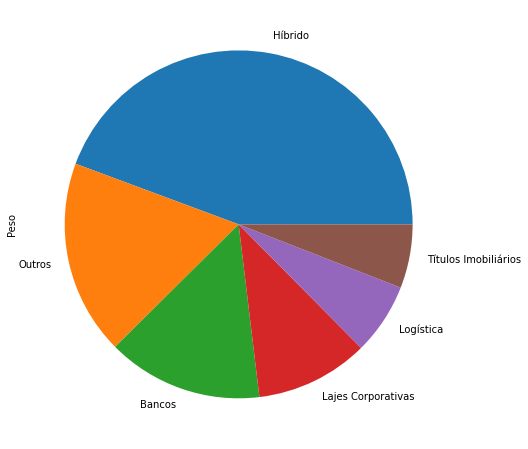

In [ ]:
segmto.plot.pie(y='Peso', figsize=(8, 8), legend=False)

In [ ]:
#Lista todos as ações que tenho e remove duplicidades
tickets = data_df['Titulo'].drop_duplicates()
tickets = tickets.str.lower() + '.sa'

tickets

1     bcff11.sa
2     sdil11.sa
5      itsa4.sa
6      bbdc4.sa
7     bpff11.sa
9     mxrf11.sa
11    mfii11.sa
12    rect11.sa
22    qagr11.sa
Name: Titulo, dtype: object

In [ ]:
#Carrega dados históricos dos tickets
data_hist = pd.DataFrame()
for t in tickets:
  data_hist[t] = dt.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

data_hist.info()

data_hist.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 652 entries, 2017-09-27 to 2020-09-25
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bcff11.sa  652 non-null    float64
 1   sdil11.sa  652 non-null    float64
 2   itsa4.sa   652 non-null    float64
 3   bbdc4.sa   652 non-null    float64
 4   bpff11.sa  652 non-null    float64
 5   mxrf11.sa  652 non-null    float64
 6   mfii11.sa  652 non-null    float64
 7   rect11.sa  264 non-null    float64
 8   qagr11.sa  109 non-null    float64
dtypes: float64(9)
memory usage: 50.9 KB


,bcff11.sa,sdil11.sa,itsa4.sa,bbdc4.sa,bpff11.sa,mxrf11.sa,mfii11.sa,rect11.sa,qagr11.sa
Date,,,,,,,,,
2020-05-27,78.910004,95.290001,9.032753,19.469629,93.849998,10.64,121.970001,90.800003,78.419998
2020-05-28,78.910004,95.199997,8.923686,19.031212,95.989998,10.81,121.500000,92.599998,78.930000
2020-05-29,78.910004,95.000000,8.784872,18.881754,97.989998,10.83,123.779999,93.900002,78.989998
2020-06-01,78.910004,92.260002,9.013439,19.728689,95.720001,10.74,122.370003,96.959999,80.739998
2020-09-25,90.680000,101.739998,9.020000,19.780001,81.839996,10.87,126.169998,96.500000,83.739998


In [ ]:
returns = np.log(data_hist/data_hist.shift(1))

returns.tail()

,bcff11.sa,sdil11.sa,itsa4.sa,bbdc4.sa,bpff11.sa,mxrf11.sa,mfii11.sa,rect11.sa,qagr11.sa
Date,,,,,,,,,
2020-05-27,0.000000,0.007479,0.021077,0.017033,0.015138,0.007547,0.016200,0.014644,-0.013049
2020-05-28,0.000000,-0.000945,-0.012148,-0.022775,0.022546,0.015851,-0.003861,0.019630,0.006482
2020-05-29,0.000000,-0.002103,-0.015678,-0.007884,0.020621,0.001848,0.018592,0.013941,0.000760
2020-06-01,0.000000,-0.029266,0.025686,0.043878,-0.023438,-0.008345,-0.011457,0.032068,0.021913
2020-09-25,0.139029,0.097810,0.000728,0.002597,-0.156661,0.012032,0.030581,-0.004756,0.036483


In [ ]:
returns.mean()*250

bcff11.sa    0.101499
sdil11.sa    0.047484
itsa4.sa     0.037933
bbdc4.sa    -0.049646
bpff11.sa   -0.057205
mxrf11.sa    0.055692
mfii11.sa    0.029990
rect11.sa   -0.033201
qagr11.sa   -0.521948
dtype: float64

In [ ]:
returns.std()*250**0.5

bcff11.sa    0.093459
sdil11.sa    0.315878
itsa4.sa     0.352655
bbdc4.sa     0.412939
bpff11.sa    0.291151
mxrf11.sa    0.191417
mfii11.sa    0.313086
rect11.sa    0.251840
qagr11.sa    0.465396
dtype: float64

In [ ]:
cov_matrix = returns.cov()*250
cov_matrix

,bcff11.sa,sdil11.sa,itsa4.sa,bbdc4.sa,bpff11.sa,mxrf11.sa,mfii11.sa,rect11.sa,qagr11.sa
bcff11.sa,0.008735,0.005203,-0.000195,0.000366,-0.008487,0.000556,0.001808,-0.000613,0.012529
sdil11.sa,0.005203,0.099779,0.029817,0.037525,0.033573,0.027341,0.032576,0.062882,0.192642
itsa4.sa,-0.000195,0.029817,0.124365,0.126726,0.015973,0.023391,0.016766,0.031233,0.075761
bbdc4.sa,0.000366,0.037525,0.126726,0.170519,0.016166,0.029544,0.022803,0.044077,0.117340
bpff11.sa,-0.008487,0.033573,0.015973,0.016166,0.084769,0.019039,0.027821,0.040152,0.136757
mxrf11.sa,0.000556,0.027341,0.023391,0.029544,0.019039,0.036640,0.016321,0.028886,0.069409
mfii11.sa,0.001808,0.032576,0.016766,0.022803,0.027821,0.016321,0.098023,0.031422,0.100304
rect11.sa,-0.000613,0.062882,0.031233,0.044077,0.040152,0.028886,0.031422,0.063424,0.081302
qagr11.sa,0.012529,0.192642,0.075761,0.117340,0.136757,0.069409,0.100304,0.081302,0.216593


In [ ]:
corr_matrix = returns.corr()
corr_matrix

,bcff11.sa,sdil11.sa,itsa4.sa,bbdc4.sa,bpff11.sa,mxrf11.sa,mfii11.sa,rect11.sa,qagr11.sa
bcff11.sa,1.000000,0.176253,-0.005922,0.009488,-0.311903,0.031074,0.061799,-0.017965,0.127271
sdil11.sa,0.176253,1.000000,0.267667,0.287687,0.365053,0.452192,0.329392,0.587545,0.658385
itsa4.sa,-0.005922,0.267667,1.000000,0.870224,0.155565,0.346506,0.151849,0.295344,0.272647
bbdc4.sa,0.009488,0.287687,0.870224,1.000000,0.134463,0.373763,0.176380,0.328722,0.325645
bpff11.sa,-0.311903,0.365053,0.155565,0.134463,1.000000,0.341626,0.305203,0.405484,0.506293
mxrf11.sa,0.031074,0.452192,0.346506,0.373763,0.341626,1.000000,0.272329,0.452817,0.407077
mfii11.sa,0.061799,0.329392,0.151849,0.176380,0.305203,0.272329,1.000000,0.483116,0.555341
rect11.sa,-0.017965,0.587545,0.295344,0.328722,0.405484,0.452817,0.483116,1.000000,0.511568
qagr11.sa,0.127271,0.658385,0.272647,0.325645,0.506293,0.407077,0.555341,0.511568,1.000000


In [ ]:
corr_matrix.mean()

bcff11.sa    0.118900
sdil11.sa    0.458241
itsa4.sa     0.372653
bbdc4.sa     0.389597
bpff11.sa    0.322421
mxrf11.sa    0.408598
mfii11.sa    0.370601
rect11.sa    0.449626
qagr11.sa    0.484914
dtype: float64